In [2]:
import scipy.stats as sts
import scipy.special as scp
import numpy as np
import matplotlib.pyplot as plt
import itertools as it

In [6]:
f = open('IB_statistics_data_hw7.txt', 'r')
line_1 = f.readline()
list_ex = line_1.split(' ')
list_ex

['ex1', 'ex2', 'ex3', 'ex4', 'ex5', 'ex6', 'ex7a', 'ex7b\n']

In [7]:
data = [[] for x in range(len(list_ex))]
data

for line in f:
    res = line.split(' ')
    for i in range(len(res)):
        data[i].append(res[i])
        
for i in range(len(data)-1):
    for j in range(len(data[0])):
        data[i][j] = float(data[i][j])

In [13]:
#1a
arr_1 = data[0]
arr_1 = np.array(sorted(arr_1))
x_mean = arr_1.mean()
n = len(arr_1)
print(x_mean, n, sum(arr_1))

0.34579439252336447 214 74.0


In [15]:
s = sts.binom.ppf(0.95, n, 0.5)
1- sts.binom.cdf(s, n, 0.5)

0.04361020835113971

In [16]:
s

119.0

In [20]:
(0.05 - (1- sts.binom.cdf(s, n, 0.5)))/(sts.binom.cdf(s, n, 0.5) - sts.binom.cdf(s-1, n, 0.5))

0.44897636536038105

In [22]:
#2
arr_2 = data[1]
arr_2 = np.array(sorted(arr_2))
x_mean = arr_2.mean()
n = len(arr_2)
print(x_mean, n, sum(arr_2))

2.022502665439722 214 432.8155704041005


In [24]:
g1 = sts.weibull_min.ppf(0.025, 4, 2)
g2 = sts.weibull_min.ppf(0.975, 4, 2)

In [27]:
#3
arr_3 = data[2]
arr_3 = np.array(sorted(arr_3))

x_mean = arr_3.mean()
n = len(arr_3)
X_ep = arr_3

print(x_mean, n)

3.4377464350910922 214


<function matplotlib.pyplot.show(*args, **kw)>

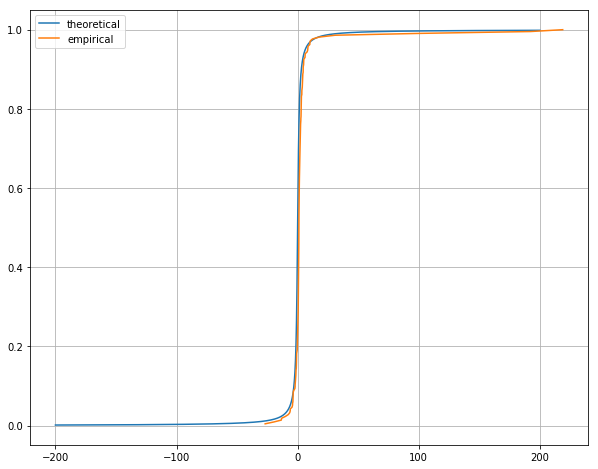

In [30]:
def dist_func_3(x):
    return sts.cauchy.cdf(x, scale = 1)

def emp_dist_func(arr):
    res = []
    res_1 = []
    n = len(arr)
    for i in range(1,n+1):
        res.append(i/n)
        res_1.append((i-1)/n)
    return res, res_1

X = np.linspace(-200, 200, 200000)
Y = dist_func_3(X)
Y_ep, w = emp_dist_func(X_ep)

f = plt.figure(figsize = (10, 8))
plt.plot(X, Y, label = 'theoretical')
plt.plot(X_ep, Y_ep, label = 'empirical')
plt.legend()
plt.grid()
plt.show

In [32]:
func = dist_func_3

def finding_sup(X_ep, emp_dist_func:callable, func:callable):
    res = 0
    x_ind = 0 
    n = len(X_ep)
    Y_ep, Y_ep_1 = emp_dist_func(X_ep)
    for i in range(n):
        m = np.sqrt(n)*abs(Y_ep[i] - func(X_ep[i]))
        m_1 = np.sqrt(n)*abs(Y_ep_1[i] - func(X_ep[i]))
        if m > res:
            res = m
            x_ind = X_ep[i]
        if m_1 > res:
            res = m_1
            x_ind = X_ep[i]
    #print(x_ind)
    print('Kolmogorov:')
    print(res, x_ind)
    return res

# KOLMOGOROV
t = finding_sup(X_ep, emp_dist_func, func)

Kolmogorov:
5.2432972011928065 0.465961035110836


In [36]:
l = 0
for x in arr_3:
    if x > 0:
        l += 1
l

165

In [37]:
print(-1.95, np.sqrt(n/((1-0.5)*0.5))*(l/n - 0.5), 1.95)

-1.95 7.929596753486094 1.95


In [34]:
arr_3

array([-2.68172009e+01, -1.96354932e+01, -1.35127479e+01, -1.31884773e+01,
       -1.00726075e+01, -7.70630924e+00, -6.52824623e+00, -6.10762247e+00,
       -6.08648644e+00, -4.62714532e+00, -4.20350571e+00, -4.15217816e+00,
       -3.88819415e+00, -3.83651518e+00, -3.80395581e+00, -3.68302305e+00,
       -3.65206003e+00, -3.64377069e+00, -3.24093941e+00, -2.29054085e+00,
       -2.06650031e+00, -2.06070112e+00, -1.93838341e+00, -1.87988673e+00,
       -1.64735697e+00, -1.48561684e+00, -1.48047977e+00, -1.43226774e+00,
       -1.31729902e+00, -1.31599868e+00, -1.10284606e+00, -1.03795890e+00,
       -1.00119909e+00, -9.66316794e-01, -9.45636813e-01, -9.32392498e-01,
       -9.15238829e-01, -9.06843011e-01, -8.05513587e-01, -5.77000826e-01,
       -3.21581450e-01, -2.76845769e-01, -2.51606222e-01, -2.11554928e-01,
       -1.82540908e-01, -1.59243301e-01, -1.07970799e-01, -5.49460171e-02,
       -5.38183082e-03,  3.11071195e-02,  4.72276198e-02,  7.73297101e-02,
        8.34738207e-02,  

In [45]:
#5
arr_5 = data[4]
arr_5 = np.array(sorted(arr_5))

x_mean = arr_5.mean()
n = len(arr_5)
X_ep = arr_5

print(x_mean, n)

0.9564778400513247 214


In [47]:
arr_5

array([0.70652642, 0.81395664, 0.83050312, 0.83417455, 0.83623602,
       0.83755898, 0.84666897, 0.85206153, 0.85472947, 0.85698724,
       0.86155802, 0.86192256, 0.86193456, 0.86851128, 0.87447651,
       0.87788316, 0.87962939, 0.88039795, 0.88095872, 0.88308028,
       0.88524128, 0.88778869, 0.89109706, 0.89396447, 0.89410114,
       0.89604033, 0.90563644, 0.90684262, 0.91361124, 0.91409508,
       0.91451747, 0.91566464, 0.91584497, 0.92329309, 0.92388081,
       0.92446203, 0.92489688, 0.92507801, 0.92534817, 0.92730822,
       0.92974112, 0.93284763, 0.93427299, 0.93561673, 0.93590176,
       0.93608088, 0.93746922, 0.94033497, 0.94057995, 0.94071805,
       0.94160548, 0.94186959, 0.94269286, 0.94301037, 0.9435055 ,
       0.94359715, 0.94475216, 0.94526406, 0.94618463, 0.94623042,
       0.94639833, 0.94645762, 0.94693064, 0.9469966 , 0.94717265,
       0.94754214, 0.94814326, 0.94849438, 0.94903644, 0.95017261,
       0.95107691, 0.95128808, 0.95135427, 0.95164618, 0.95204

<function matplotlib.pyplot.show(*args, **kw)>

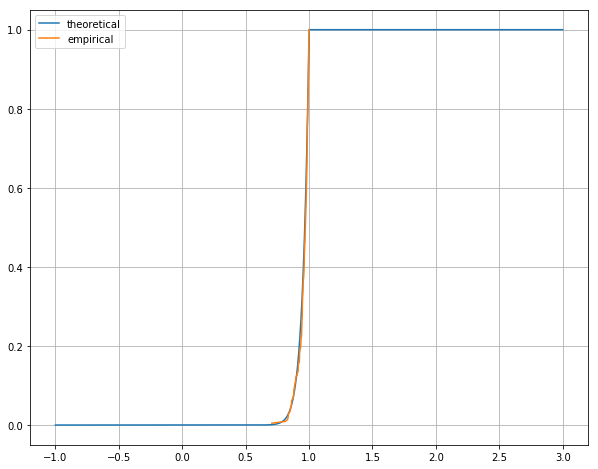

In [50]:
def dist_func_5(x):
    return (sts.uniform.cdf(x, loc = 0, scale = 1))**20

def emp_dist_func(arr):
    res = []
    res_1 = []
    n = len(arr)
    for i in range(1,n+1):
        res.append(i/n)
        res_1.append((i-1)/n)
    return res, res_1

X = np.linspace(-1, 3, 200000)
Y = dist_func_5(X)
Y_ep, w = emp_dist_func(X_ep)

f = plt.figure(figsize = (10, 8))
plt.plot(X, Y, label = 'theoretical')
plt.plot(X_ep, Y_ep, label = 'empirical')
plt.legend()
plt.grid()
plt.show

In [51]:
func = dist_func_5

def finding_sup(X_ep, emp_dist_func:callable, func:callable):
    res = 0
    x_ind = 0 
    n = len(X_ep)
    Y_ep, Y_ep_1 = emp_dist_func(X_ep)
    for i in range(n):
        m = np.sqrt(n)*abs(Y_ep[i] - func(X_ep[i]))
        m_1 = np.sqrt(n)*abs(Y_ep_1[i] - func(X_ep[i]))
        if m > res:
            res = m
            x_ind = X_ep[i]
        if m_1 > res:
            res = m_1
            x_ind = X_ep[i]
    #print(x_ind)
    print('Kolmogorov:')
    print(res, x_ind)
    return res

# KOLMOGOROV
t = finding_sup(X_ep, emp_dist_func, func)

Kolmogorov:
1.168032620580763 0.977620091754943


In [52]:
#6
arr_6 = data[5]
arr_6 = np.array(sorted(arr_6))

x_mean = arr_6.mean()
n = len(arr_6)
X_ep = arr_6

print(x_mean, n)

0.12639019910705696 214


In [76]:
arr_6

array([1.40804544e-05, 2.78808489e-04, 4.09814980e-04, 4.29860177e-04,
       5.17317123e-04, 9.12891392e-04, 1.01608463e-03, 1.13463936e-03,
       1.24415221e-03, 1.48124646e-03, 2.03620342e-03, 2.98194954e-03,
       3.51485703e-03, 4.08319377e-03, 4.20510241e-03, 4.46310110e-03,
       4.69134334e-03, 5.12998665e-03, 5.46105487e-03, 5.87682995e-03,
       6.07322625e-03, 6.28579903e-03, 6.81882817e-03, 6.84752491e-03,
       6.98230040e-03, 7.31531380e-03, 7.93716851e-03, 8.40362161e-03,
       9.62534407e-03, 1.01074601e-02, 1.04045373e-02, 1.07687523e-02,
       1.10735381e-02, 1.17971645e-02, 1.23746272e-02, 1.26062355e-02,
       1.42298044e-02, 1.43589147e-02, 1.43799930e-02, 1.50891221e-02,
       1.51411352e-02, 1.59846196e-02, 1.67195308e-02, 1.87350483e-02,
       1.89168808e-02, 1.89502579e-02, 1.94965236e-02, 2.02312383e-02,
       2.14210972e-02, 2.25368560e-02, 2.37919976e-02, 2.39358094e-02,
       2.43896893e-02, 2.45787431e-02, 2.62025119e-02, 2.68059665e-02,
      

0.4948940171771093 0.6398580217766151


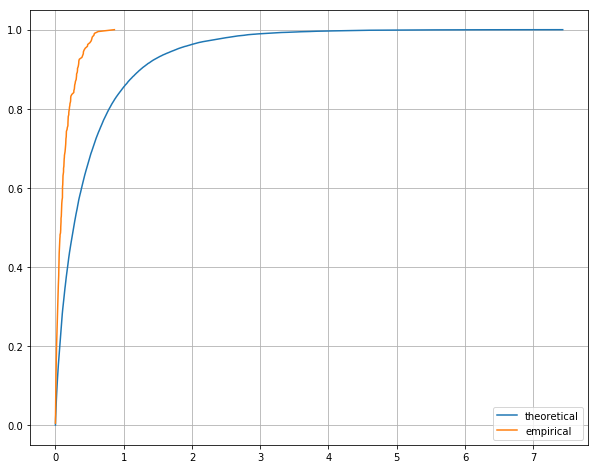

In [84]:
# Проверка формул

X = sts.expon.rvs(size = 50000, scale = 1)
tau = []
for x in X:
    tau.append(sts.uniform.rvs(size=1, loc = 0, scale = x))
tau = np.array(sorted(tau))

Y, w = emp_dist_func(tau)
Y_ep, w = emp_dist_func(X_ep)
del w

f = plt.figure(figsize = (10, 8))
plt.plot(tau, Y, label = 'theoretical')
plt.plot(X_ep, Y_ep, label = 'empirical')
plt.legend()
plt.grid()
plt.show
print(tau.mean(), tau.std())

In [75]:
#ЦПТ

eta = np.sqrt(n)*(arr_6.mean() - 1/2)/arr_6.std()
eta

-38.046525617433296

In [83]:
Yx

[2e-06,
 4e-06,
 6e-06,
 8e-06,
 1e-05,
 1.2e-05,
 1.4e-05,
 1.6e-05,
 1.8e-05,
 2e-05,
 2.2e-05,
 2.4e-05,
 2.6e-05,
 2.8e-05,
 3e-05,
 3.2e-05,
 3.4e-05,
 3.6e-05,
 3.8e-05,
 4e-05,
 4.2e-05,
 4.4e-05,
 4.6e-05,
 4.8e-05,
 5e-05,
 5.2e-05,
 5.4e-05,
 5.6e-05,
 5.8e-05,
 6e-05,
 6.2e-05,
 6.4e-05,
 6.6e-05,
 6.8e-05,
 7e-05,
 7.2e-05,
 7.4e-05,
 7.6e-05,
 7.8e-05,
 8e-05,
 8.2e-05,
 8.4e-05,
 8.6e-05,
 8.8e-05,
 9e-05,
 9.2e-05,
 9.4e-05,
 9.6e-05,
 9.8e-05,
 0.0001,
 0.000102,
 0.000104,
 0.000106,
 0.000108,
 0.00011,
 0.000112,
 0.000114,
 0.000116,
 0.000118,
 0.00012,
 0.000122,
 0.000124,
 0.000126,
 0.000128,
 0.00013,
 0.000132,
 0.000134,
 0.000136,
 0.000138,
 0.00014,
 0.000142,
 0.000144,
 0.000146,
 0.000148,
 0.00015,
 0.000152,
 0.000154,
 0.000156,
 0.000158,
 0.00016,
 0.000162,
 0.000164,
 0.000166,
 0.000168,
 0.00017,
 0.000172,
 0.000174,
 0.000176,
 0.000178,
 0.00018,
 0.000182,
 0.000184,
 0.000186,
 0.000188,
 0.00019,
 0.000192,
 0.000194,
 0.000196,
 0.00019